<a href="https://colab.research.google.com/github/odhiambk/CIS-678-Machine-Learning/blob/main/FP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Data Loading and Preprocessing**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting styles
plt.style.use('seaborn')
sns.set_context('notebook')

<ipython-input-1-f0c471855f1f>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


### 1.1 Loading RNA and ADT Data
The data is loaded from the provided URLs. The RNA data contains 639 features, and the ADT data contains 25 features. Each sample is identified by a unique identifier.

In [2]:
# Load ADT data
adt_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_adt.csv')

# Rename the first column for clarity
adt_data.rename(columns={'Unnamed: 0': 'feature_name'}, inplace=True)

# Load RNA data
rna_data = pd.read_csv('https://raw.githubusercontent.com/odhiambk/CIS-678-Machine-Learning/main/training_set_rna.csv')

# Display the first few rows of each dataset
print("ADT Data:")
display(adt_data.head())

print("RNA Data:")
display(rna_data.head())

ADT Data:


,feature_name,training_sample_1,training_sample_2,training_sample_3,training_sample_4,training_sample_5,training_sample_6,training_sample_7,training_sample_8,training_sample_9,...,training_sample_3991,training_sample_3992,training_sample_3993,training_sample_3994,training_sample_3995,training_sample_3996,training_sample_3997,training_sample_3998,training_sample_3999,training_sample_4000
0,CD11a,0.413866,0.294449,0.531469,0.263649,0.438042,0.686346,0.730096,0.299949,1.111089,...,0.526016,1.348110,0.512804,0.408960,1.166204,0.713007,0.368821,1.064956,1.060479,0.808950
1,CD11c,1.299088,0.136347,1.043159,0.246849,0.284185,0.404868,0.603104,0.354919,0.482943,...,0.512543,0.490426,0.371848,0.320178,2.240665,0.609743,0.217903,0.880499,0.475405,0.371848
2,CD123,0.474643,0.205216,0.520798,0.073185,0.265222,0.564916,0.426254,0.426254,0.321830,...,0.607170,0.426254,0.375404,0.724171,1.967158,0.426254,0.073185,1.714842,0.686671,0.265222
3,CD127-IL7Ra,0.402731,0.757762,0.354215,0.872654,1.337662,1.864847,0.615251,0.984558,0.303224,...,1.124305,0.320511,1.764897,0.303224,0.386819,1.796728,1.191072,0.249493,2.544464,1.850105
4,CD14,0.527878,0.160274,0.298374,0.189462,0.272238,0.419696,0.587582,0.323845,0.272238,...,0.396581,0.396581,0.527878,0.323845,2.448333,0.606716,0.160274,1.459272,0.625492,0.507158


RNA Data:


,Unnamed: 0,training_sample_1,training_sample_2,training_sample_3,training_sample_4,training_sample_5,training_sample_6,training_sample_7,training_sample_8,training_sample_9,...,training_sample_3991,training_sample_3992,training_sample_3993,training_sample_3994,training_sample_3995,training_sample_3996,training_sample_3997,training_sample_3998,training_sample_3999,training_sample_4000
0,RPL22,1.946768,2.993597,2.327345,3.355145,2.992697,3.409415,3.241927,3.219029,2.797789,...,2.791541,2.979010,3.776064,1.593003,3.770663,2.535107,3.322802,2.018552,3.790125,3.059502
1,PARK7,1.387045,0.000000,1.727283,0.000000,0.000000,0.000000,1.013754,0.000000,1.814190,...,1.808623,1.977239,0.000000,0.000000,0.000000,1.362115,0.000000,0.000000,1.151552,0.000000
2,ENO1,0.000000,1.747344,0.000000,0.000000,0.000000,1.297154,1.013754,1.757990,1.814190,...,0.000000,0.000000,1.660966,0.000000,0.000000,0.000000,0.000000,2.018552,0.000000,1.622036
3,RBP7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,AGTRAP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.013754,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Exploratory Data Analysis (EDA)**

### 2.1 Overview of the Dataset
- **ADT Data**: Contains 25 features representing different protein expression levels.
- **RNA Data**: Contains 639 features representing gene expression levels.
- A brief look at the dimensions and summary statistics of the data.

In [3]:
# Display dataset shapes
print(f"ADT Data Shape: {adt_data.shape}")
print(f"RNA Data Shape: {rna_data.shape}")

# Basic statistics for both datasets
print("ADT Data Description:")
display(adt_data.describe())

print("RNA Data Description:")
display(rna_data.describe())

ADT Data Shape: (25, 4001)
RNA Data Shape: (639, 4001)
ADT Data Description:


,training_sample_1,training_sample_2,training_sample_3,training_sample_4,training_sample_5,training_sample_6,training_sample_7,training_sample_8,training_sample_9,training_sample_10,...,training_sample_3991,training_sample_3992,training_sample_3993,training_sample_3994,training_sample_3995,training_sample_3996,training_sample_3997,training_sample_3998,training_sample_3999,training_sample_4000
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.938552,0.454393,0.822112,0.512407,0.656542,0.944794,1.166965,0.709960,0.950716,0.486722,...,0.862220,0.877710,0.810425,0.685759,0.818430,0.926380,0.508266,0.715261,1.112654,0.842682
std,0.770648,0.495071,0.719618,0.435892,0.717091,0.668183,0.968108,0.559886,0.928240,0.389125,...,0.514221,0.870365,0.639480,0.983597,0.651544,0.782827,0.533054,0.416434,0.683595,0.662858
min,0.152759,0.000000,0.243963,0.000000,0.000000,0.199701,0.223793,0.262902,0.130137,0.148149,...,0.180034,0.106992,0.150667,0.167290,0.192494,0.160187,0.073185,0.156773,0.296670,0.179300
25%,0.470135,0.165568,0.506957,0.213890,0.265222,0.419696,0.563029,0.323845,0.335091,0.251362,...,0.526016,0.382227,0.419996,0.303224,0.342953,0.494794,0.199701,0.431905,0.625492,0.366837
50%,0.620719,0.294449,0.655673,0.281578,0.397318,0.686346,0.824316,0.426254,0.542471,0.337177,...,0.670814,0.511812,0.575669,0.397318,0.595010,0.713007,0.350760,0.614922,0.900092,0.522276
75%,1.260321,0.551156,0.795934,0.744406,1.040075,1.313080,1.520258,0.901579,1.194734,0.533306,...,1.187624,0.958404,1.092155,0.625369,1.166204,1.012798,0.531041,0.844533,1.518425,1.293896
max,3.302371,2.399096,3.699744,1.746442,3.325337,2.603971,4.215085,2.336669,3.772564,1.680703,...,2.348355,4.038376,2.519534,4.752236,2.448333,3.778033,2.547815,1.725293,2.814163,2.499761


RNA Data Description:


,training_sample_1,training_sample_2,training_sample_3,training_sample_4,training_sample_5,training_sample_6,training_sample_7,training_sample_8,training_sample_9,training_sample_10,...,training_sample_3991,training_sample_3992,training_sample_3993,training_sample_3994,training_sample_3995,training_sample_3996,training_sample_3997,training_sample_3998,training_sample_3999,training_sample_4000
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,...,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,1.282594,1.093566,1.229613,1.034389,1.022967,1.235114,1.398340,1.233240,1.276375,0.994739,...,1.123186,1.227613,1.130861,0.767980,1.163262,1.336849,1.077772,1.266737,1.332152,1.247435
std,1.476839,1.550780,1.459662,1.595786,1.589232,1.483184,1.373659,1.507114,1.414681,1.553666,...,1.518929,1.447887,1.501932,1.138912,1.544891,1.438437,1.570333,1.494649,1.445085,1.474983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.387045,0.000000,0.000000,0.000000,0.000000,1.297154,1.013754,0.000000,1.814190,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.362115,0.000000,0.000000,1.151552,0.000000
75%,1.946768,1.747344,2.327345,2.324013,2.348485,1.843361,2.082400,2.360999,2.422341,2.121320,...,1.808623,2.598648,2.254317,1.593003,2.249370,1.918229,2.039204,2.642966,2.013474,2.211213
max,6.476432,6.090763,6.790172,5.750552,5.652808,6.540027,6.442326,6.645251,6.621235,6.765469,...,6.634901,6.771006,6.769569,6.778492,5.724707,6.277608,6.705037,5.543493,6.241550,6.596340


### 2.2 Checking for Missing Values
Analyze both datasets to identify missing values and ensure data integrity.

In [4]:
# Check for missing values
print(f"Missing values in ADT data: {adt_data.isnull().sum().sum()}")
print(f"Missing values in RNA data: {rna_data.isnull().sum().sum()}")

Missing values in ADT data: 0
Missing values in RNA data: 0


**Data Preparation**

### 3.1 Transpose and Align the Datasets
- Transpose the datasets if necessary to ensure that samples are represented as rows.
- Align both datasets based on common sample identifiers.

In [5]:
# Transpose ADT data to have samples as rows and set feature names as columns
adt_data_transposed = adt_data.iloc[:, 1:].T  # Drop the first column and transpose
adt_data_transposed.columns = adt_data['feature_name']  # Set feature names as columns

# Transpose RNA data if necessary
rna_data_transposed = rna_data.T  # Transpose RNA data

# Check if transposition is correct
print(f"Transposed ADT Data Shape: {adt_data_transposed.shape}")
print(f"Transposed RNA Data Shape: {rna_data_transposed.shape}")

# Align both datasets based on common sample identifiers
common_samples = rna_data_transposed.index.intersection(adt_data_transposed.index)
rna_filtered = rna_data_transposed.loc[common_samples]
adt_filtered = adt_data_transposed.loc[common_samples]

# Verify shapes after filtering
print(f"Filtered RNA Data Shape: {rna_filtered.shape}")
print(f"Filtered ADT Data Shape: {adt_filtered.shape}")

Transposed ADT Data Shape: (4000, 25)
Transposed RNA Data Shape: (4001, 639)
Filtered RNA Data Shape: (4000, 639)
Filtered ADT Data Shape: (4000, 25)


**Modeling and Evaluation**

### 4.1 Predicting ADT Features Using RNA Data
For each ADT feature, we will build a Linear Regression and Ridge Regression model to predict the feature values using RNA data as predictors.

In [6]:
# Initialize dictionaries to store results
mse_linear = {}
mse_ridge = {}

# Iterate through each ADT feature
for adt_feature in adt_filtered.columns:
    # Prepare data for regression
    X = rna_filtered  # RNA features
    y = adt_filtered[adt_feature]  # Single ADT feature

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    y_pred_linear = linear_model.predict(X_test)

    # Evaluate linear regression model
    mse_linear[adt_feature] = mean_squared_error(y_test, y_pred_linear)

    # Fit Ridge regression model
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)

    # Evaluate Ridge regression model
    mse_ridge[adt_feature] = mean_squared_error(y_test, y_pred_ridge)

### 4.2 Model Evaluation
Display the Mean Squared Error (MSE) values for each ADT feature using both Linear Regression and Ridge Regression.

In [7]:
# Display MSE results for each ADT feature
mse_results = pd.DataFrame({
    'Linear Regression MSE': mse_linear,
    'Ridge Regression MSE': mse_ridge
})

display(mse_results)

,Linear Regression MSE,Ridge Regression MSE
CD11a,0.046148,0.046126
CD11c,0.107605,0.107558
CD123,0.229869,0.229764
CD127-IL7Ra,0.141189,0.141107
CD14,0.112124,0.112050
CD16,0.162083,0.161972
CD161,0.123271,0.123204
CD19,0.168282,0.168204
CD197-CCR7,0.097676,0.097617
CD25,0.169638,0.169557


**Results Summary and Analysis**

### 5.1 Analysis of Model Performance
- **Performance Comparison**: Compare the MSE values for Linear Regression and Ridge Regression.
- **Best Performing Features**: Identify features with the lowest MSE.
- **Challenging Features**: Highlight features that are difficult to predict, indicated by high MSE.

Top 5 Features with Lowest MSE (Linear Regression):


,Linear Regression MSE,Ridge Regression MSE
CD11a,0.046148,0.046126
HLA.DR,0.085404,0.085361
CD28,0.085894,0.085848
CD197-CCR7,0.097676,0.097617
CD27,0.104054,0.104006


Top 5 Features with Lowest MSE (Ridge Regression):


,Linear Regression MSE,Ridge Regression MSE
CD11a,0.046148,0.046126
HLA.DR,0.085404,0.085361
CD28,0.085894,0.085848
CD197-CCR7,0.097676,0.097617
CD27,0.104054,0.104006


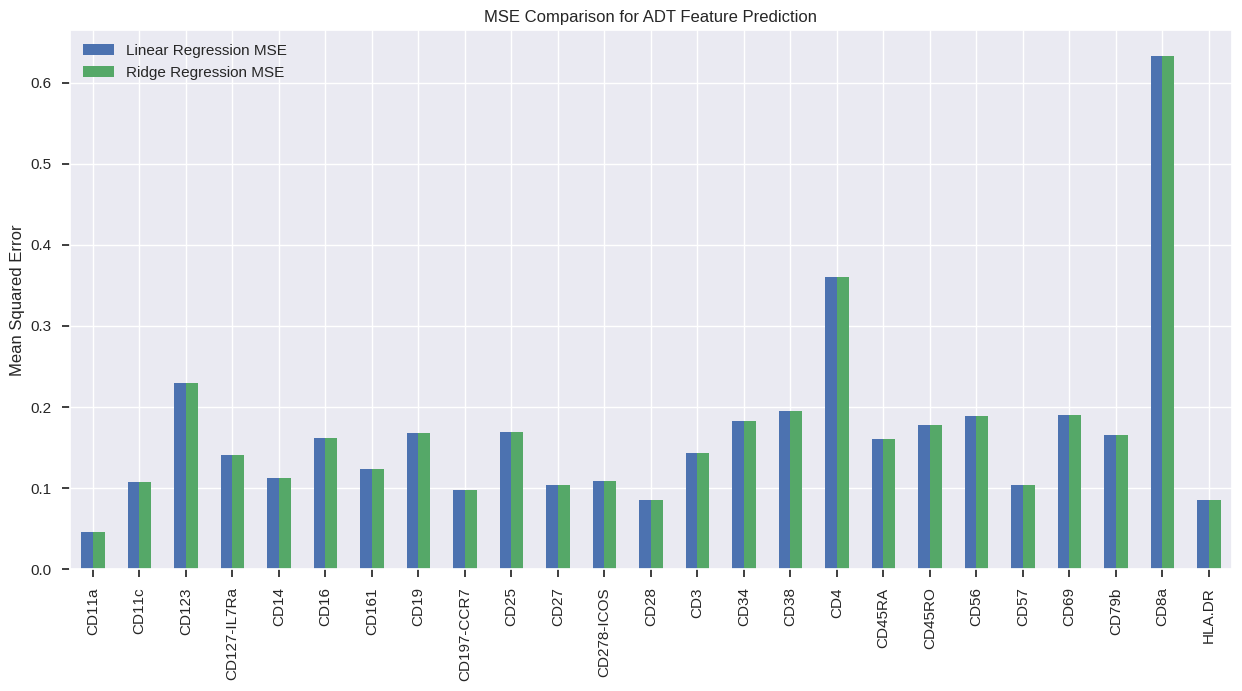

In [8]:
# Find top features with the lowest MSE for both models
print("Top 5 Features with Lowest MSE (Linear Regression):")
display(mse_results.nsmallest(5, 'Linear Regression MSE'))

print("Top 5 Features with Lowest MSE (Ridge Regression):")
display(mse_results.nsmallest(5, 'Ridge Regression MSE'))

# Visualize the MSE results
mse_results.plot(kind='bar', figsize=(15, 7))
plt.title("MSE Comparison for ADT Feature Prediction")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=90)
plt.show()